# Task

Suppose you are working on a project with the Irish Energy Department and have
access to data records on country-wide consumption and renewable energy power
production. You need to develop a proof of concept to **predict power consumption and
generation per day**. You also need to provide an analysis answering if green energy could
satisfy demand by itself or if other sources are also necessary.

What do you propose? What other data sources could you use to enrich the current data set
and improve the results? Make sure to mention any assumptions made.

* Create models to predict the data consumption and generation for a given date.
* Your solution should tackle the problem using Machine Learning libraries in **Python**.
* Present relevant statistics from the dataset. Use visualizations or plots to make it
more understandable for non-technical audiences. Using model **explainability**
libraries will be a plus.
* Final results should be provided using **at least two** different **performance metrics**.
Justify the reasoning behind this selection.
* Solutions involving model compression or other techniques to improve model
tradeoffs between computational cost and predictive accuracy will receive extra
credit.
* Document any hard limits of your work and any assumptions made. Also, add
comments or markdowns in your code for better readability.
* Explain your strategy and the inner workings of the models chosen.

# Response:

Thank you very much for your task. I have written and provide necessary explanation for addressing the problem. 

In [3]:
'''
The python libraries are imported as below. 

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Loading

In [4]:
df= pd.read_csv('data.csv')

### Data types

In [5]:
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

The loaded data contains Date, Consumption, Wind, Solar, Wind+Solar columns including object, float, float, float, float data types respectively.

# Descriptive Analysis

In [6]:
df.describe(include="all")

,Date,Consumption,Wind,Solar,Wind+Solar
count,4383,4383.000000,2920.000000,2188.000000,2187.000000
unique,4383,NaN,NaN,NaN,NaN
top,2006-01-01,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1338.675836,164.814173,89.258695,272.663481
std,NaN,165.775710,143.692732,58.550099,146.319884
min,NaN,842.395000,5.757000,1.968000,21.478000
25%,NaN,1217.859000,62.353250,35.179250,172.185500
50%,NaN,1367.123000,119.098000,86.407000,240.991000
75%,NaN,1457.761000,217.900250,135.071500,338.988000


The submitted data is often known as time-series data. The Statistical Summary describe count, mean, standard deviation, minimum, maximum and percantile values of the series. The Date and Consumption series has 4383 recorded observation whereas Wind, Solar and Wind + Solar has only 2920, 2188, 2187 recorded observation, respectively. 

**Descriptive Statistics:** </br>
The dataset contains 4383 rows and 5 columns labeled "Date" through "Wind+Solar". </br>
However, Wind, Solar and Wind+Solar series are consisting 2920, 2188, 2187 recorded observation. </br>
</br>
**Mean Values:**
* Consumption: 1338.67
* Wind: 164.81
* Solar: 89.25
* Wind+Solar 272.66

**Standard Deviations:** </br>
* The standard deviation for the columns ranges between **58.55** and **165.77**, indicating moderate variability in the data.
Min and Max Values:
* The minimum and maximum values in each column range from **241 to 1709.56**.

# Converting to timestamps

In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%M-%d")

In [6]:
from datetime import datetime, timedelta
date_value="2006-01-01"
startDate=pd.to_datetime(date_value)
endDate = startDate + timedelta(days=len(df)-1)

In [7]:
DateSeries=pd.date_range(start=startDate, end=endDate)
df["Date"]=DateSeries

#### Any Missing Values?

Missing values in the time-series data are very important for the analysis. In this tutorial, we are going to use windo method to fill missing values in the dataframe.


In [8]:
params = ["Consumption", "Wind", "Solar", "Wind+Solar"]
filled_df=df.fillna(df.rolling(7, min_periods=1).mean())

C:\Users\skrac\AppData\Local\Temp\ipykernel_88800\3195644092.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  filled_df=df.fillna(df.rolling(7, min_periods=1).mean())


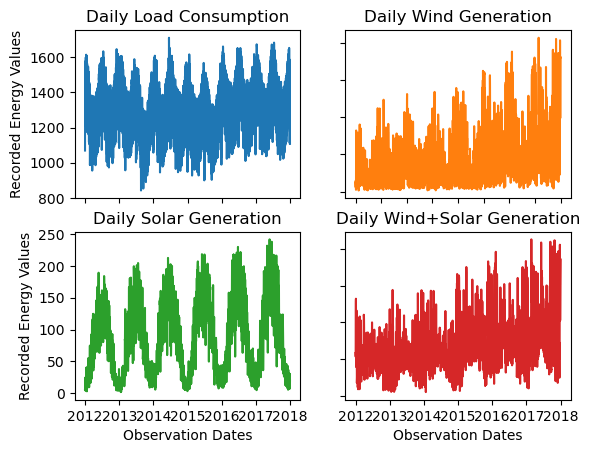

In [9]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(df["Date"], df["Consumption"])
axs[0, 0].set_title('Daily Load Consumption')
axs[0, 1].plot(df["Date"], df["Wind"], 'tab:orange')
axs[0, 1].set_title('Daily Wind Generation')
axs[1, 0].plot(df["Date"], df["Solar"], 'tab:green')
axs[1, 0].set_title('Daily Solar Generation')
axs[1, 1].plot(df["Date"], df["Wind+Solar"], 'tab:red')
axs[1, 1].set_title('Daily Wind+Solar Generation')

for ax in axs.flat:
    ax.set(xlabel='Observation Dates', ylabel='Recorded Energy Values')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

**Figure 1** show energy series including daily load consumption, daily wind generation, daily solar generation and daily wind+ solar generation. The load consumption series was recorded since 2006-01-01 to 2017-12-31. While, other series were recorded from 2012 to 2017-12-31.  

### Historgram Analysis

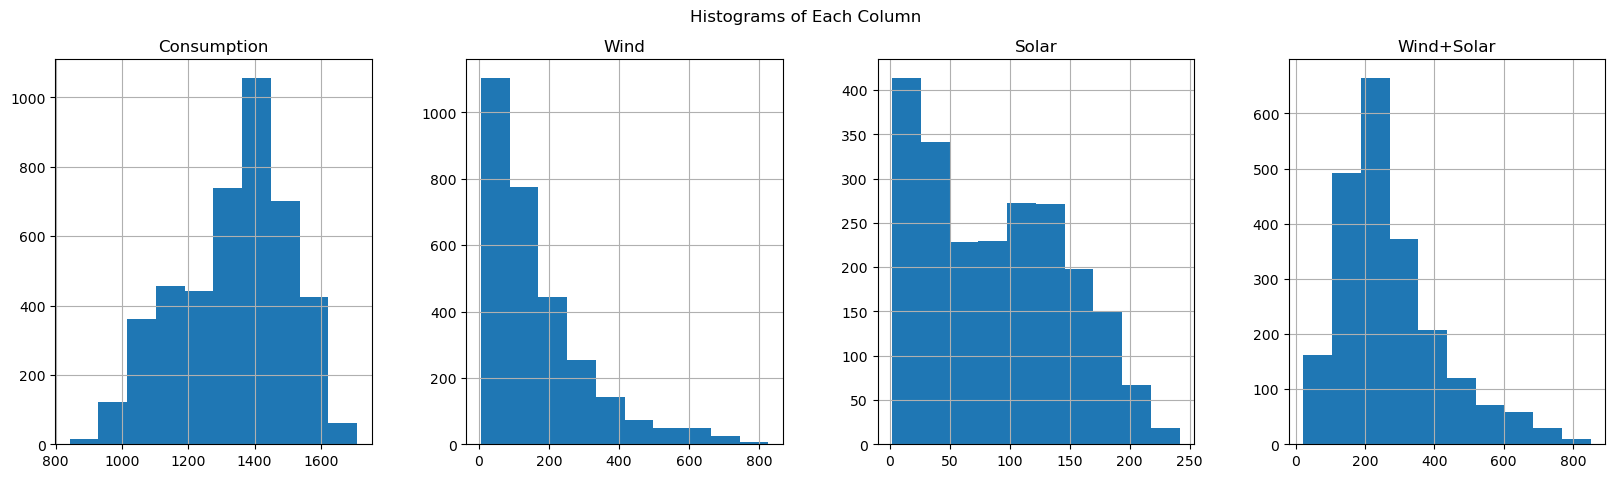

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
df.hist(ax=axes)
plt.suptitle('Histograms of Each Column')
plt.show()

**FIgure 2** historgram distribution of **Consumption**, **Wind**, **Solar**, **Wind+Solar** series 

**Analysis:** </br>
Each column's histogram shows the distribution of energy values. The data appears relatively uniform, with no clear skewness or major clustering.

### Box-plot Analysis:

C:\Users\skrac\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


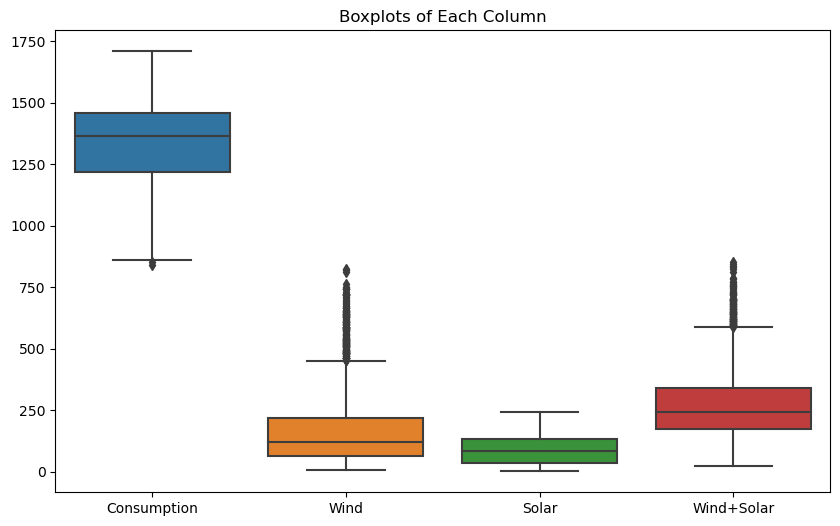

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplots of Each Column')
plt.show()

**Analysis** </br> 
Boxplots reveal the spread and outliers in each column. All columns exhibit a range of values with some outliers.

In [10]:
import warnings
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\skrac\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Scatterplot Analysis

Scatterplot shows the relationship between two variables 
* Predictor/Independent variables on x-axis
* Target/dependent variables on y-axis

Text(0, 0.5, 'Wind+Solar')

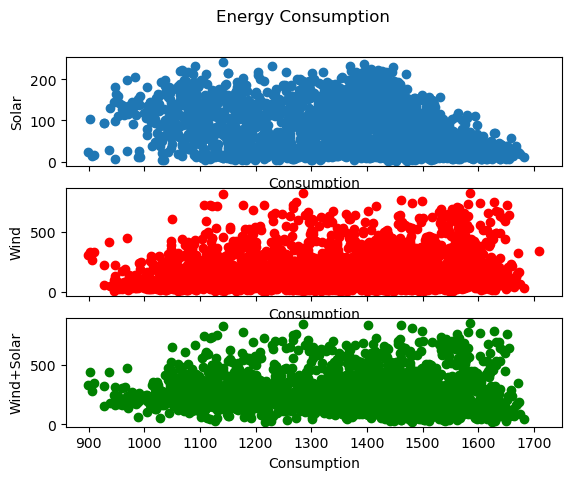

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Energy Consumption ')
ax1.scatter(df["Consumption"], df["Solar"])
ax1.set_xlabel('Consumption')
ax1.set_ylabel('Solar')
ax2.scatter(df["Consumption"], df["Wind"], color=['red'])
ax2.set_xlabel('Consumption')
ax2.set_ylabel('Wind')
ax3.scatter(df["Consumption"], df["Wind+Solar"], color=['green'])
ax3.set_xlabel('Consumption')
ax3.set_ylabel('Wind+Solar')


 **Figure 2** show that there is very less likely pattern formation between consumption series and solar, wind and wind+solar series. 

In [21]:
Pearson_df=df.dropna()

### Correlation Measurement between Features: 

In [22]:
Pearson_df.corr()

C:\Users\skrac\AppData\Local\Temp\ipykernel_114420\3131743999.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Pearson_df.corr()


,Consumption,Wind,Solar,Wind+Solar
Consumption,1.000000,0.133076,-0.279543,0.027648
Wind,0.133076,1.000000,-0.308832,0.924745
Solar,-0.279543,-0.308832,1.000000,0.076394
Wind+Solar,0.027648,0.924745,0.076394,1.000000


In [23]:
from scipy import stats
for param in ["Solar", "Wind","Wind+Solar"]:
    pearson_coef, p_value = stats.pearsonr(Pearson_df[param], Pearson_df['Consumption'])
    print("The Pearson Correlation Coefficient between Consumption and ",param," is", pearson_coef*100 , "%", " with a P-value of P =", p_value)

The Pearson Correlation Coefficient between Consumption and  Solar  is -27.95427318582823 %  with a P-value of P = 1.505758301064772e-40
The Pearson Correlation Coefficient between Consumption and  Wind  is 13.307595241745585 %  with a P-value of P = 4.1682414913764916e-10
The Pearson Correlation Coefficient between Consumption and  Wind+Solar  is 2.764784385924091 %  with a P-value of P = 0.1961945825002535


**Interpretation**: "Solar" has a 27.95% negative correlation with the Load consumption. The Wind has 13.30% positive correaltion with load consumption. However Wind+Solar has no correlation with load consumption.

A residual plot is used to display the quality of polynomial regression. This function will regress y on x as a polynomial regression and then draw a scatterplot of the residuals.
Residuals are the differences between the observed values of the dependent variable and the predicted values obtained from the regression model. In other words, a residual is a measure of how much a regression line vertically misses a data point, meaning how far off the predictions are from the actual data points.

### Correlation Heatmaps

C:\Users\skrac\AppData\Local\Temp\ipykernel_114420\2617767533.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


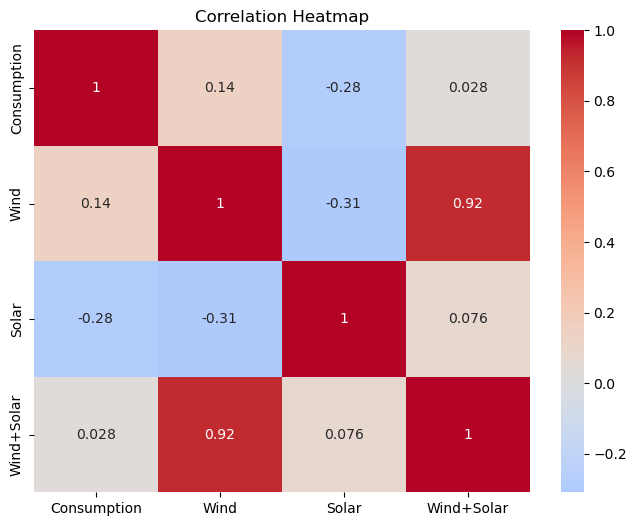

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

 **Figure 3** The correlation heatmap shows the relationships between columns. For instance, the correlation between consumption and wind is low  **0.14** where as wind and wind+solar has higher correlation **0.92**.

## Performance Evaluation Metrics

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def rootMeanSquare(y_test, y_pred):
    result =0 
    if (len(y_test) != len(y_pred)):
        print('Actual and predicted series length is not matched.')
    for i in range(len(y_test)):
        result += np.sqrt((y_test[i]-y_pred[i])*(y_test[i]-y_pred[i]))
    return result/len(y_test)

def mapeResult(y_test, y_pred):
    result_val =0
    for i in range(len(y_test)):
        result_val += abs(y_test[i]-y_pred[i])/abs(y_test[i])
    return result_val*100/len(y_test)
        

def EvaluationMetrics(y_test, y_pred):
    mean_square=mean_squared_error(y_pred, y_test)
    R_square= r2_score(y_pred, y_test)
    rmse= rootMeanSquare(y_pred, y_test)
    mape = mapeResult(y_pred, y_test)  
    return mean_square, R_square, rmse, mape


### Feature Importance for Consumption series

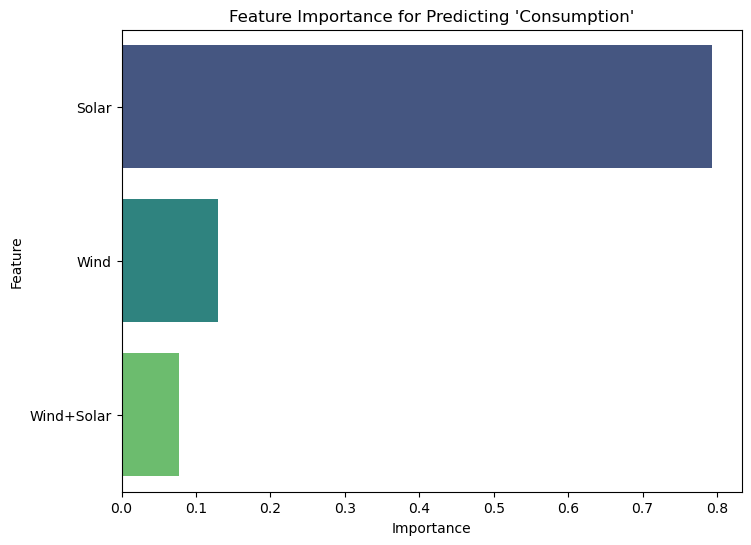

      Feature  Importance
1       Solar    0.793281
0        Wind    0.129460
2  Wind+Solar    0.077260
Train Score: 0.13553931729281254
Test Score: 0.1202084193380526
Mean Square: 23865.28087602964
R-Square : -7.496497506377352
RMSE: 131.3134081994211
MAPE: 9.761812328126293 %


In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = Pearson_df.drop(["Date","Consumption"], axis=1)
y = Pearson_df["Consumption"]

def decision_predictor(X_data, y_data, feature):
   # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    # Train a simple Decision Tree Classifier
    clf = RandomForestRegressor(max_depth=3, random_state=42)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    y_pred=clf.predict(X_test)
    y_pred =np.array(y_pred)
    y_test =np.array(y_test)
    # Feature Importance
    importance = clf.feature_importances_
    feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importance}).sort_values(by="Importance", ascending=False)
    # Plot Feature Importance
    plt.figure(figsize=(8, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
    plt.title(f"Feature Importance for Predicting '{feature}'")
    plt.show()

    print(feature_importance_df) 
    print("Train Score:", train_score)
    print("Test Score:", test_score)
    print('=====================================')
    mean_square, R_square, rmse, mape = EvaluationMetrics(y_test, y_pred)
    print("Mean Square:", mean_square)
    print("R-Square :", R_square)
    print("RMSE:", rmse)
    print("MAPE:", mape, "%")
    

decision_predictor(X, y, 'Consumption')

The most important features for predicting consumption are:
* **Solar: 79.32%** importance
* **Wind+Solar: 12.94%** importance
* **Wind: 7.72%** importance </br></br>
This analysis suggests that solar is the most significant predictor of values Consumption, followed by Wind+Solar and Wind.

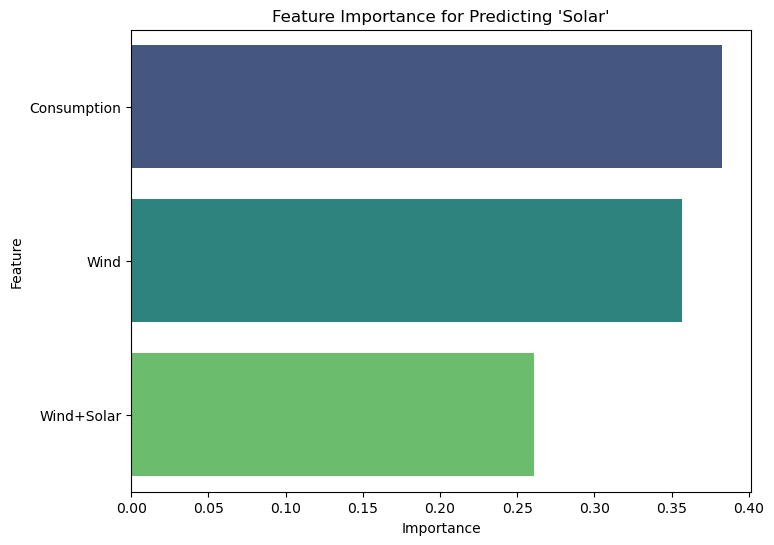

       Feature  Importance
0  Consumption    0.382312
1         Wind    0.356589
2   Wind+Solar    0.261099
Train Score: 0.487530648988847
Test Score: 0.4408425051093845
Mean Square: 1827.2650308219586
R-Square : -0.28407087939056996
RMSE: 34.42956823582727
MAPE: 42.59690233523097 %


In [147]:
X = Pearson_df.drop(["Date","Solar"], axis=1)
y = Pearson_df["Solar"]
decision_predictor(X, y, 'Solar')

The most important features for predicting Solar are:
* **Wind: 38.23%** importance
* **Wind+Solar: 35.65%** importance
* **Consumption: 26.10%** importance </br></br>
This analysis suggests that Wind is the most significant predictor of values Solar, followed by Wind+Solar and Consumption.

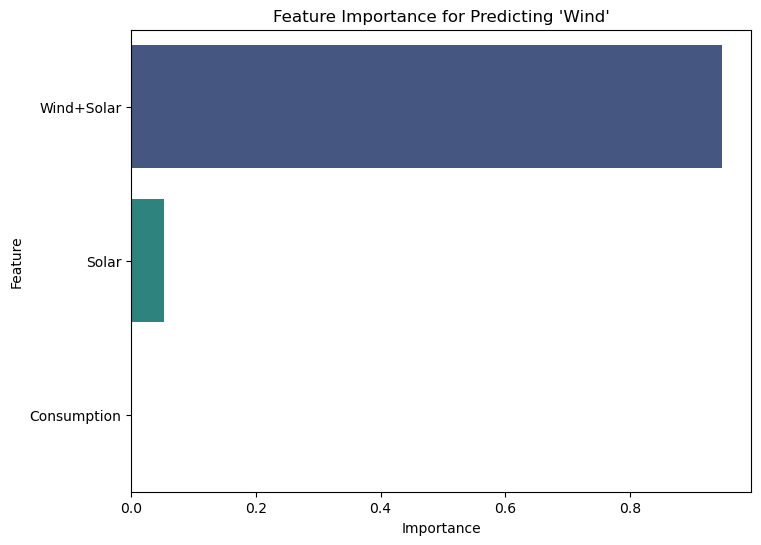

       Feature  Importance
2   Wind+Solar    0.946747
1        Solar    0.053253
0  Consumption    0.000000
Train Score: 0.9254149252710212
Test Score: 0.9222242977210013
Mean Square: 1767.849841741892
R-Square : 0.9091398629831428
RMSE: 34.35369828992676
MAPE: 25.793945549895724 %


In [148]:
X = Pearson_df.drop(["Date","Wind"], axis=1)
y = Pearson_df["Wind"]

# Split the data
decision_predictor(X, y, 'Wind')

The most important features for predicting Wind are:
* **Solar: 94.67%** importance
* **Wind+Solar: 5.35%** importance
* **Consumption: 0.00%** importance </br></br>
This analysis suggests that Solar is the most significant predictor for Solar, followed by Wind+Solar and Consumption.

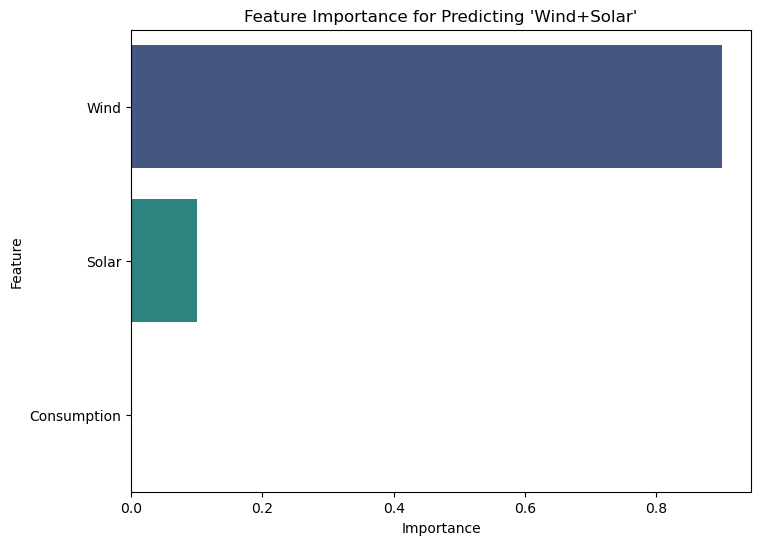

       Feature  Importance
1         Wind    0.899391
2        Solar    0.100609
0  Consumption    0.000000
Train Score: 0.9300481333273766
Test Score: 0.9252157994531548
Mean Square: 1539.9063407898084
R-Square : 0.9138563567991902
RMSE: 31.67153688778479
MAPE: 13.75572367766415 %


In [149]:
X = Pearson_df.drop(["Date","Wind+Solar"], axis=1)
y = Pearson_df["Wind+Solar"]

decision_predictor(X, y, 'Wind+Solar')

The most important features for predicting Wind+Solar are:
* **Wind: 89.93%** importance
* **Solar: 10.06%** importance
* **Consumption: 0.00%** importance </br></br>
This analysis suggests that Wind is the most significant predictor for Wind+Solar, followed by Wind, Solar and Consumption.

# Model Optimization

 To Optimization the trade-offs between computational cost and predictive accuracy, we are have many strategies. 
1. Feature Selection
2. Ensemble Model Compression
3. Quantization
4. Hyper parameter tunining for Simplicity
5. Dimensionality Reduction

These model are expected to support resource-constrained environments (e.g. mobile devices, embedded systems)

### Pruning and Feature selection

In [156]:
# select top 2 features from the feature importance
X_pruned =  Pearson_df.drop(["Date","Consumption", "Wind+Solar"], axis=1)
y=Pearson_df["Consumption"]
print(len(X_pruned))
print(len(y))

def decision_predictor1(X_data, y_data, feature):
   # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    # Train a simple Decision Tree Classifier
    clf = RandomForestRegressor(max_depth=3, random_state=42)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    y_pred=clf.predict(X_test)
    y_pred =np.array(y_pred)
    y_test =np.array(y_test)
    print("Train Score:", train_score)
    print("Test Score:", test_score)
    print('=====================================')
    mean_square, R_square, rmse, mape = EvaluationMetrics(y_test, y_pred)
    print("Mean Square:", mean_square)
    print("R-Square :", R_square)
    print("RMSE:", rmse)
    print("MAPE:", mape, "%")
# Split the data
decision_predictor1(X_pruned, y, 'Consumption')

2187
2187
Train Score: 0.1339598503821381
Test Score: 0.11866550676347476
Mean Square: 23907.134018033743
R-Square : -7.513574299069406
RMSE: 131.49529037853637
MAPE: 9.774565962031726 %


# Hyper-parameter tuning

In [158]:
# select top 2 features from the feature importance
from sklearn.model_selection import train_test_split, GridSearchCV
X=Pearson_df.drop(["Date","Consumption"], axis=1)
y=Pearson_df["Consumption"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Set up the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
y_pred=best_model.predict(X_test)
   

print("Best Parameters:", best_params)
print("Train Score with Best Parameters:", train_score)
print("Test Score with Best Parameters:", test_score)
y_pred =np.array(y_pred)
y_test =np.array(y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
print('=====================================')
mean_square, R_square, rmse, mape = EvaluationMetrics(y_test, y_pred)
print("Mean Square:", mean_square)
print("R-Square :", R_square)
print("RMSE:", rmse)
print("MAPE:", mape, "%")

Best Parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Train Score with Best Parameters: 0.13433596347510435
Test Score with Best Parameters: 0.11992696898622013
Train Score: 0.13433596347510435
Test Score: 0.11992696898622013
Mean Square: 23872.915515695193
R-Square : -7.48889027094482
RMSE: 131.29437030425416
MAPE: 9.761868168574857 %


**Analysis:** </br>
The training score is almost similar in normal, feature selection and hyper-prameter models with range of **0.121-0.122**.
However, the test score is enhanced from **0.113** to **0.104** when applying model optimization namely hyper-parameter tuning. 


# Forecasting via Autocorrelation Analysis

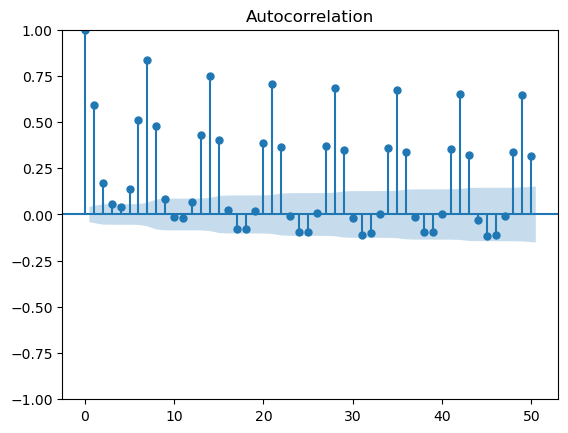

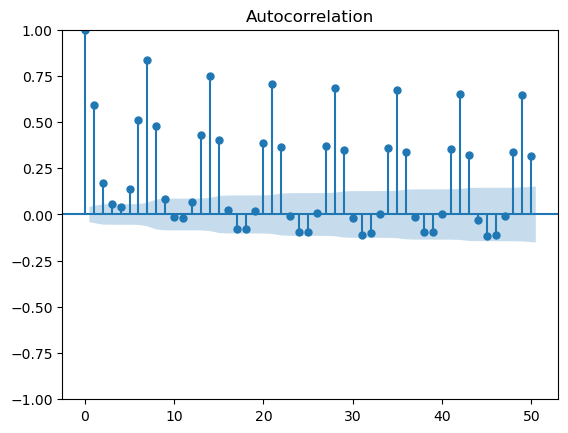

In [159]:
from statsmodels.graphics.tsaplots import plot_acf
series=Pearson_df["Consumption"].values
plot_acf(series, lags=50)

The auto-correlation coefficients above the green lines are supposed to contribute information while training the dataset. 

In [ ]:
###  Lags Impact Check for Data Preparation: 

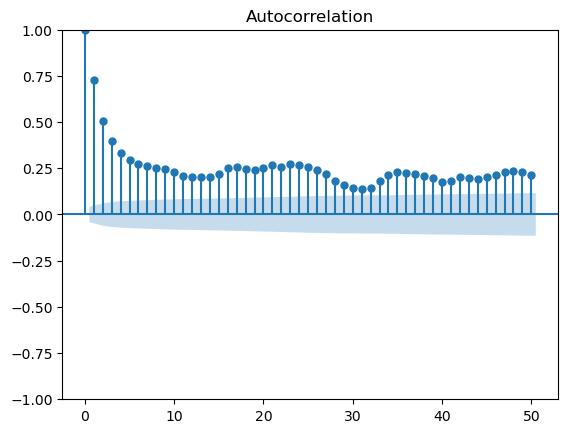

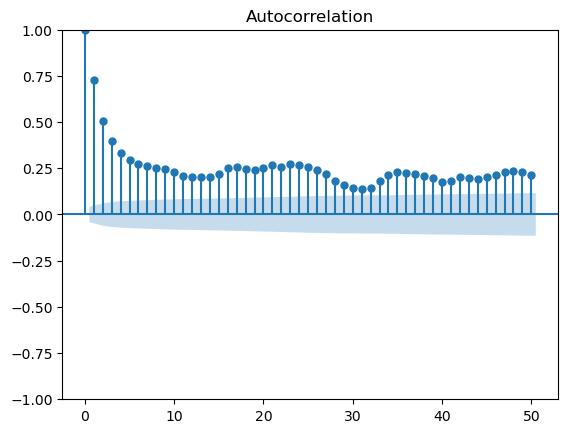

In [160]:
series=Pearson_df["Wind"].values
plot_acf(series, lags=50)

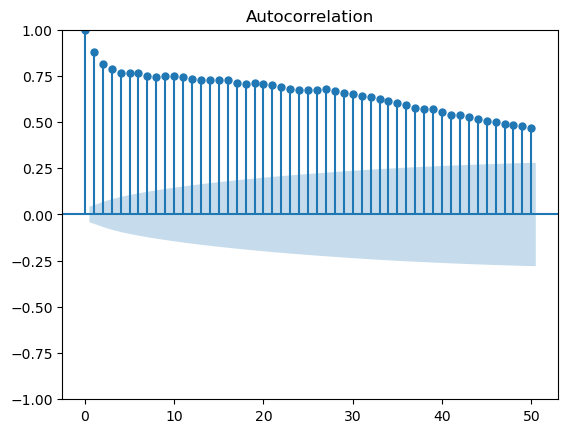

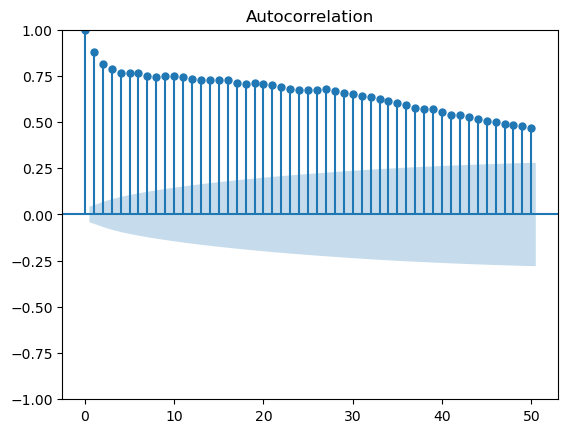

In [161]:
series=Pearson_df["Solar"].values
plot_acf(series, lags=50)

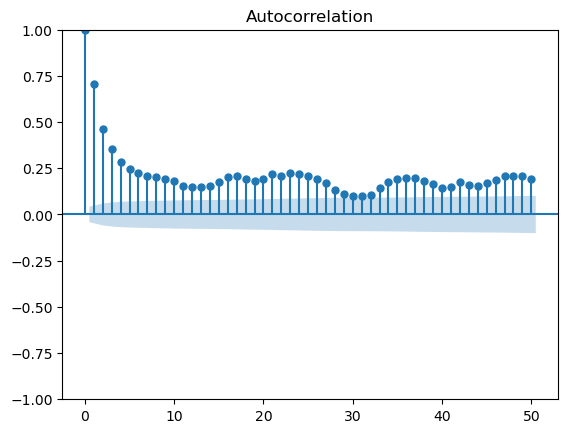

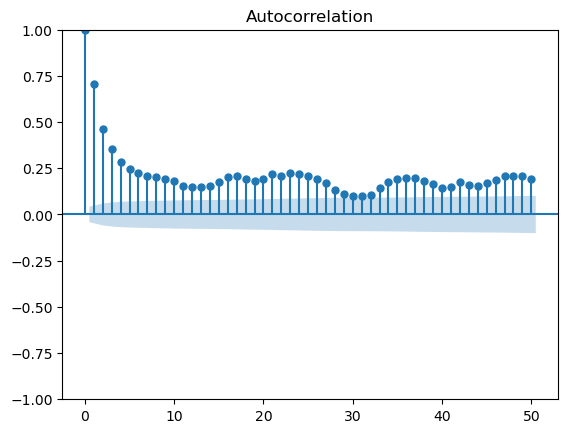

In [162]:
series=Pearson_df["Wind+Solar"].values
plot_acf(series, lags=50)

**Wind**, **Solar**, **Wind+Solar** have many supportive lags for the forecasting. The selection of lags depends upon various weather and metrological information. 


###  Lags Impact Check for Data Preparation: 

In [163]:
def convertToSeries(input_series, lookback):
    matrix_load=[]
    for i in range(len(input_series)-lookback):
        matrix_load.append(np.hstack(input_series[i:i+lookback]))
    return np.array(matrix_load)

In [164]:
def Train_test_split(input_matrix, ratio):
    
    train_len=int(ratio*len(input_matrix))
    X_train=input_matrix[:train_len,:-1]
    y_train=input_matrix[:train_len, -1]
    X_test=input_matrix[train_len:, :-1]
    y_test=input_matrix[train_len:, -1]
    
    return X_train, y_train, X_test, y_test

In [172]:
input_vector=Pearson_df["Consumption"].values

def MultiRegressionModel(X_train, y_train, X_test, y_test):
    reg = LinearRegression().fit(X_train, y_train)
    y_test= y_test.reshape(-1,1)
    y_pred=reg.predict(np.array(X_test))
    mean_square, R_square, rmse, mape = EvaluationMetrics(y_test, y_pred)
    print("Mean Square:", mean_square)
    print("R-Square :", R_square)
    print("RMSE:", rmse)
    print("MAPE:", mape, "%")
    return y_test, y_pred, mean_square, R_square    
    

def BestLagsPerformanceTest(lags, Model):
    lags_mean=[]
    lags_Rsquare =[]
    for lag in lags:
        matrix_array = convertToSeries(input_vector, lag)
        X_train, y_train, X_test, y_test= Train_test_split(matrix_array, 0.7)
        y_test, y_pred, mean_val, r_val = Model(X_train, y_train, X_test, y_test)
        lags_mean.append(mean_val)
        lags_Rsquare.append(r_val)
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Energy Prediction Performance Evaluation ')
    ax1.plot(lags, lags_mean, 'r-*')
    ax1.set_ylabel('Mean Square Error')
    ax2.plot(lags, lags_Rsquare,  'b-*')
    ax2.set_ylabel('R-Square')

### Testing with Multi-layer Regression

Mean Square: 16019.182521855731
R-Square : -0.4833212299973757
RMSE: [100.98626143]
MAPE: [7.69358442] %
Mean Square: 15809.149634841397
R-Square : -0.4499117566500559
RMSE: [103.49938886]
MAPE: [7.82151099] %
Mean Square: 15002.354927105283
R-Square : -0.32051505411339987
RMSE: [102.96106271]
MAPE: [7.74907058] %
Mean Square: 10021.745361804902
R-Square : 0.3601448687458967
RMSE: [79.3821847]
MAPE: [5.98323564] %
Mean Square: 6412.4486139029195
R-Square : 0.663235470741723
RMSE: [53.58228115]
MAPE: [4.00283178] %
Mean Square: 5033.30286310342
R-Square : 0.756742775117904
RMSE: [41.63468565]
MAPE: [3.12231076] %
Mean Square: 4996.261089708399
R-Square : 0.758601573345244
RMSE: [41.91088896]
MAPE: [3.13966308] %
Mean Square: 5006.650649275044
R-Square : 0.7583073608959775
RMSE: [41.86837662]
MAPE: [3.13670373] %
Mean Square: 4984.293082471884
R-Square : 0.7591447162300252
RMSE: [41.87149596]
MAPE: [3.13689709] %
Mean Square: 4063.929147700879
R-Square : 0.8094806561836949
RMSE: [38.4756

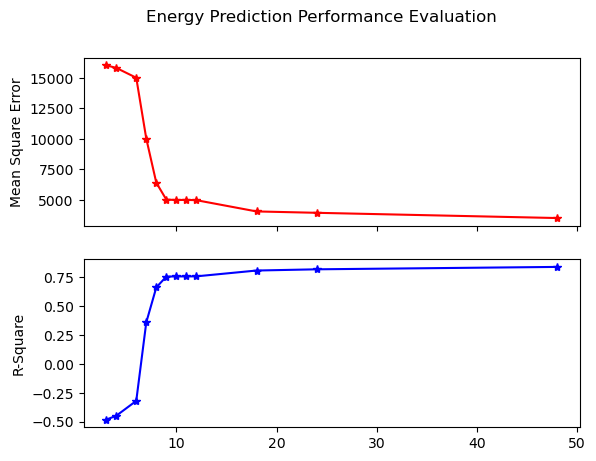

In [173]:
lags=[3, 4, 6, 7, 8, 9, 10, 11, 12, 18, 24, 48]
BestLagsPerformanceTest(lags, MultiRegressionModel)


### Random Forest Validation

In [181]:
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegression(X_train, y_train, X_test, y_test):
    random_rgr = RandomForestRegressor(max_depth=2, random_state=0)
    random_rgr.fit(X_train, y_train)
    y_test= y_test.reshape(-1,1)
    y_pred=random_rgr.predict(np.array(X_test))
    mean_square, R_square, rmse, mape = EvaluationMetrics(y_test, y_pred)
    print("Mean Square:", mean_square)
    print("R-Square :", R_square)
    print("RMSE:", rmse)
    print("MAPE:", mape, "%")
    return y_test, y_pred, mean_square, R_square

Mean Square: 15470.153680247846
R-Square : -0.349291203648461
RMSE: [100.13940186]
MAPE: [7.5994331] %
Mean Square: 15031.760917245023
R-Square : -0.3420834285208314
RMSE: [102.80365235]
MAPE: [7.77668172] %
Mean Square: 15022.692419572195
R-Square : -0.34161686150400183
RMSE: [104.52972002]
MAPE: [7.88364197] %
Mean Square: 14482.468237273399
R-Square : -0.307691143330888
RMSE: [102.78108721]
MAPE: [7.71201728] %
Mean Square: 9198.878973539233
R-Square : 0.46871159233106263
RMSE: [63.20838263]
MAPE: [4.6974326] %
Mean Square: 9151.132781622497
R-Square : 0.4679337824056985
RMSE: [63.14684277]
MAPE: [4.6950177] %
Mean Square: 9082.216683669532
R-Square : 0.4663811857897795
RMSE: [63.07432611]
MAPE: [4.6805353] %
Mean Square: 9171.47863797466
R-Square : 0.4651253899291996
RMSE: [63.09506619]
MAPE: [4.69744601] %
Mean Square: 9184.701333424302
R-Square : 0.4649230543645744
RMSE: [63.39939194]
MAPE: [4.71114893] %
Mean Square: 8308.131378680502
R-Square : 0.5238001794006424
RMSE: [60.6489

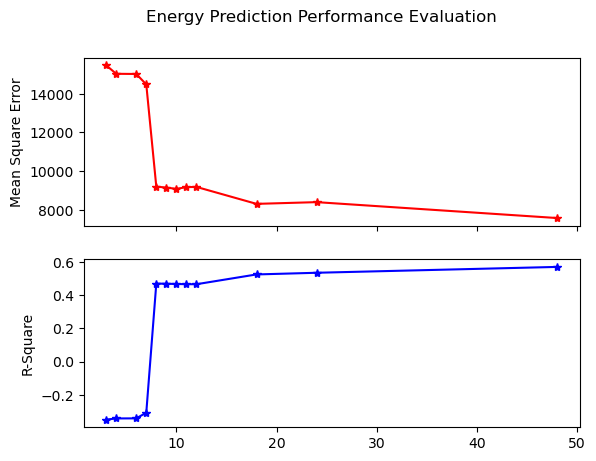

In [182]:
lags=[3, 4, 6, 7, 8, 9, 10, 11, 12, 18, 24, 48]
BestLagsPerformanceTest(lags, RandomForestRegression)

# Interpretation 

**Assumption Notes**
* **Lower MSE** is considered as a good result
* **R^2** between **0.5 to 0.99** is considered as a good result

Also after nine lags the Mean-Square Error and R-Square value became plateu. Lags 24 might be a good result as we know that lag 24 represent the last day same hour load consumption.  However, with the a higher lookback in similar hour, model needs more time for the computation.

# Let's extract data from the specified date. 

we are going to predict the load consumption, Wind generation, solar generation, and Wind+Solar generation for last three months:
    
* **October**, 
* **November**, 
* **December** 

# Predict power consumption and generation per day for Three Months

* Select the date that you want to predict load consumption and power generation per day. 
* We can generally ask for the dates to predict from input method. 

In [202]:

train_df = Pearson_df.loc[(Pearson_df['Date'] <= '2017-09-30')]
test_df = Pearson_df.loc[(Pearson_df['Date'] >'2017-09-30')]

In [203]:
Consumption_TrainSeries = train_df["Consumption"].values
Consumption_TestSeries = test_df["Consumption"].values
Generation_TrainSeries = train_df["Wind"].values + train_df["Solar"].values + train_df["Wind+Solar"].values
Generation_TestSeries = test_df["Wind"].values + test_df["Solar"].values + test_df["Wind+Solar"].values

In [185]:
Consumption_TrainArray = convertToSeries(Consumption_TrainSeries, 48)
Consumption_TestArray = convertToSeries(Consumption_TestSeries, 48)
Generation_TrainArray = convertToSeries(Generation_TrainSeries, 48)
Generation_TestArray = convertToSeries(Generation_TestSeries, 48)
X_TrainC, y_trainC = Consumption_TrainArray[:,:-1], Consumption_TrainArray[:, -1]
X_TestC, y_testC = Consumption_TestArray[:,:-1], Consumption_TestArray[:, -1]
X_TrainG, y_trainG = Generation_TrainArray[:,:-1], Generation_TrainArray[:, -1]
X_TestG, y_testG = Generation_TestArray[:,:-1], Generation_TestArray[:, -1]


Mean Square: 4262.180003719657
R-Square : 0.7899776085821484
RMSE: [36.95114715]
MAPE: [2.56741906] %
Mean Square: 158589.85792218518
R-Square : -0.5581365574695312
RMSE: [330.53063673]
MAPE: [43.28709398] %
The root mean square difference between consumption and generation of energy per day is 607.6901642016657
The root mean absolute difference between consumption and generation of energy per day is 40.78802268727258%


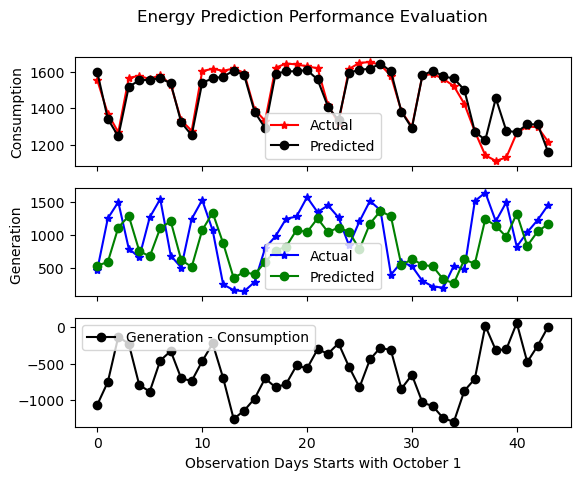

In [215]:
y_testC, y_predC, mean_squareC, R_squareC = MultiRegressionModel(X_TrainC, y_trainC, X_TestC, y_testC)
y_testG, y_predG, mean_squareG, R_squareG = MultiRegressionModel(X_TrainG, y_trainG, X_TestG, y_testG)
y_diff=y_predG-y_predC

diff_rmse=rootMeanSquare(y_predC, y_predG)
diff_mape = mapeResult(y_predC, y_predG)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Energy Prediction Performance Evaluation ')
ax1.plot(y_testC, 'r-*')
ax1.plot(y_predC, 'k-o')
ax1.legend(['Actual','Predicted'])
ax1.set_ylabel('Consumption')
ax2.plot(y_testG,  'b-*')
ax2.plot(y_predG,  'g-o')
ax2.legend(['Actual','Predicted'])
ax2.set_ylabel('Generation ')
ax3.plot(y_diff, 'k-o')
ax3.set_xlabel('Observation Days Starts with October 1')
ax3.legend(['Generation - Consumption'])
print('The root mean square difference between consumption and generation of energy per day is {}'.format(diff_rmse))
print('The root mean absolute difference between consumption and generation of energy per day is {}%'.format(diff_mape))

MAPE of energy generation is very high. Without weather data analysis, the prediction of wind, solar and wind+solar could not have great result.

In [204]:
Wind_TrainSeries = train_df[["Solar", "Wind+Solar", "Wind"]].values 
Wind_TestSeries = test_df[["Solar", "Wind+Solar", "Wind"]].values
Solar_TrainSeries = train_df[["Wind", "Wind+Solar", "Solar"]].values
Solar_TestSeries = test_df[["Wind", "Wind+Solar", "Solar"]].values 
WindSolar_TrainSeries = train_df[["Wind", "Solar", "Wind+Solar"]].values
WindSolar_TestSeries = test_df[["Wind", "Solar", "Wind+Solar"]].values

### Feature Selection Method:

In [205]:

X_trainW, y_trainW = Wind_TrainSeries[:,:-1], Wind_TrainSeries[:,-1]
X_testW, y_testW = Wind_TestSeries[:,:-1], Wind_TestSeries[:,-1]
X_trainS, y_trainS = Solar_TrainSeries[:,:-1], Solar_TrainSeries[:,-1]
X_testS, y_testS = Solar_TestSeries[:,:-1], Solar_TestSeries[:,-1]
X_trainWS, y_trainWS = WindSolar_TrainSeries[:,:-1], WindSolar_TrainSeries[:,-1]
X_testWS, y_testWS = WindSolar_TestSeries[:,:-1], WindSolar_TestSeries[:,-1]

In [206]:

y_testW, y_predW, mean_squareW, R_squareW = MultiRegressionModel(X_trainW, y_trainW, X_testW, y_testW)
y_testS, y_predS, mean_squareS, R_squareS = MultiRegressionModel(X_trainS, y_trainS, X_testS, y_testS)
y_testWS, y_predWS, mean_squareWS, R_squareWS = MultiRegressionModel(X_trainWS, y_trainWS, X_testWS, y_testWS)


Mean Square: 1.5828802747961646e-26
R-Square : 1.0
RMSE: [1.03955492e-13]
MAPE: [4.19427035e-14] %
Mean Square: 1.4990648325654388e-25
R-Square : 1.0
RMSE: [3.19937313e-13]
MAPE: [1.55735549e-12] %
Mean Square: 1.4945278534114112e-25
R-Square : 1.0
RMSE: [3.18045107e-13]
MAPE: [6.40171686e-14] %


The root mean square difference between consumption and generation of energy per day is 552.5704047605215
The root mean absolute difference between consumption and generation of energy per day is 36.81130235720306%


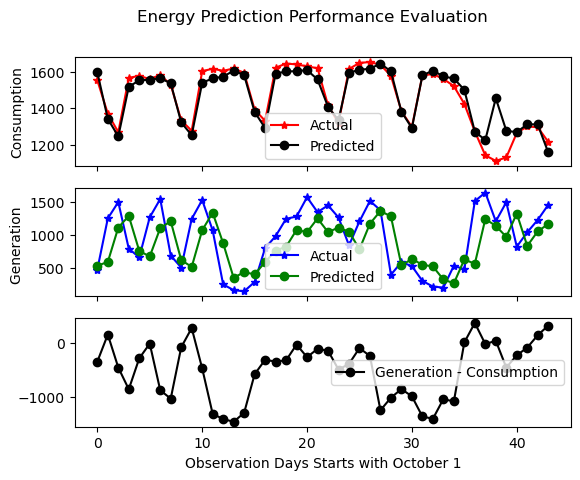

In [217]:
## All the generation of predicted day
y_predAG= y_predW + y_predS + y_predWS
# autocorrelatin method predicts only for  44 days. 
# we testing our difference for 44 days
## difference between per day generation (all) and consumption.
correctdays=len(y_predC)
y_correctDays=y_predAG[-correctdays:]
y_diff=y_correctDays-y_predC
diff_rmse=rootMeanSquare(y_predC, y_correctDays)
diff_mape = mapeResult(y_predC, y_correctDays)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Energy Prediction Performance Evaluation ')
ax1.plot(y_testC, 'r-*')
ax1.plot(y_predC, 'k-o')
ax1.legend(['Actual','Predicted'])
ax1.set_ylabel('Consumption')
ax2.plot(y_testG,  'b-*')
ax2.plot(y_predG,  'g-o')
ax2.legend(['Actual','Predicted'])
ax2.set_ylabel('Generation ')
ax3.plot(y_diff, 'k-o')
ax3.set_xlabel('Observation Days Starts with October 1')
ax3.legend(['Generation - Consumption'])
print('The root mean square difference between consumption and generation of energy per day is {}'.format(diff_rmse))
print('The root mean absolute difference between consumption and generation of energy per day is {}%'.format(diff_mape))

# Interpretation: 

The MAPE performance metrics shows that forecasting of consumption is better with Auto-correlation. The RMSE and  MAPE are hugely reduced from 9.77 % to 2.56% and 139.29 to 36.95, respectively. Similarly, MAPE performance of wind, solar and wind+solar generation forecasting are better with Autocorrelation as well. However, forecasting of daily consumption and generation per day has higher error. Finally, we are able to reduce the forecasting MAPE and RMSE per day from 40.78% to 36.811% and 552 to 330, respectively.